   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(2000, 785)
(1600, 784) (1600,)
(400, 784) (400,)
4


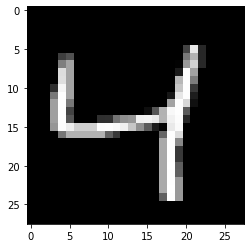

In [19]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#MINST dataset -- from Kaggle:

#" The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.
#Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a 
#single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning
#darker. This pixel-value is an integer between 0 and 255, inclusive.

#The 28x28 pixels are flattened into 784 columns, one per pixel value. The training data set, (train.csv), has 785 columns.
#The first column, called "label", is the digit that was drawn by the 
#user. The rest of the columns contain the pixel-values of the associated image. "


#In this notebook I implement knn from scratch using euclidean distance as the distance metric and then 
#find a k that makes classification most accurate for each digit.

def distance(x1, x2):
    #return np.linalg.norm(x1-x2)
     # return sum(abs(x1-x2)) #vectors x1,x2
    d = np.sqrt(((x1-x2)**2).sum())
    return d
  


def knn(X_train, y_train, xt, k=7):
    #find k nearest neighbours 
    distances = [] # stores tuples with (y val, dist) with dist and prediction for all training points from xt
    neighbors = [] #list of row/sample #s
    votes = {}
    for i in range(0, X_train.shape[0]):
        dist = distance(X_train[i], xt)
        distances.append((y_train[i], dist))
    distances.sort(key=lambda item: item[1]) # sort by distance
    
    #get the most popular y value/ class 
    #indexes=np.argsort(dists)[:k]
    for i in range(k): #0...k, first k sorted by increasing distance
        #print distances[x]
        #neighbors.append(distances[x][0])
        y_val=distances[i][0]
        if y_val not in votes:
            votes[y_val]=1
        else:
            votes[y_val]+=1
   #now we get the y values/votes for th ek nearest neighbours and return the most popular!
    sorted_votes=[(k,v) for k, v in sorted(votes.items(), key=lambda item: item[1])]
    #get the top key
    return sorted_votes[0][0]
 
def get_acc(kx):
    preds = []
    # get all predictions for each test sample
    for i in range(0,X_test.shape[0]):
        preds.append(knn(X_train, y_train, X_test[i], kx))
    preds = np.asarray(preds)
    
    # count number of correct predictions, get percentage
    return 100*float((y_test == preds).sum())/preds.shape[0]       
        

df = pd.read_csv('train.csv')
print(df.head())

#take first 2000 rows from data set 
data = df.values[:2000]
print (data.shape)

#split into train and test set
split = int(0.8 * data.shape[0])

#train data does not include the label column
X_train = data[:split, 1:]
X_test = data[split:, 1:]
y_train = data[:split, 0]
y_test = data[split:, 0]

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

#illustrating that reshaping a row of data set into 28x28 grid creates the original image
plt.figure(0)
plt.imshow(X_train[1].reshape((28, 28)), cmap='gray', interpolation='none')
print (y_train[1])
plt.show()





Result: 
91.5
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[91.5, 91.5, 81.5, 76.5, 70.0, 64.75, 59.75, 56.0, 53.25]


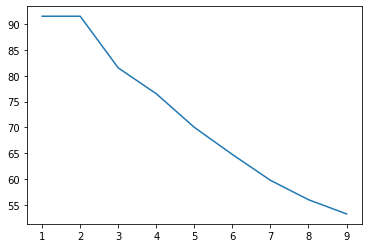

Confusion_matrix: 
[[39  0  0  0  0  0  1  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 2  1 37  0  0  0  0  2  0  0]
 [ 0  0  0 36  0  2  0  0  0  1]
 [ 1  3  0  0 35  0  0  1  0  3]
 [ 1  0  0  2  0 30  0  0  0  1]
 [ 0  1  0  0  0  1 44  0  0  0]
 [ 0  1  0  0  0  0  0 36  0  2]
 [ 0  0  0  1  1  0  0  0 28  1]
 [ 1  1  0  1  4  0  0  0  0 39]]


In [24]:
print("Result: ")
print(get_acc(1)) 
acc=[]
for k in range(1,10):
    acc.append(get_acc(k))
k=[k for k in range(1,10)]

# k=1 gives the best accuracy because the digit images are very similar in the training/test sets 
# the image is likely to be the same as the first neighbour
plt.plot(k,acc)
plt.show()


#confusion matrix 
#we see all true 1s (row 1) were predicted correctly (col 1)
#we see alot of true 9s were misclassified
n = KNeighborsClassifier(n_neighbors=3)
n.fit(X_train, y_train)
y_pred = n.predict(X_test)
print("Confusion_matrix: \n"+str(confusion_matrix(y_test, y_pred)))